## Checkpoint 4: Regression

###### By: TOLBA Yasmine

##### Pre-Step: imports

In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

### Step 1: Data visualization and preprocessing

In [62]:
sns.set(rc={'figure.figsize':(7,6)})

In [63]:
## import the dataset as a pandas dataframe
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [64]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

we can tell that there is a lot of columns in our dataset, in order to do an effective feature selection, we must see which features are most important and affect the housing price effectively to perform the regression, we can select the features through data visualization.

In [65]:
data.describe

<bound method NDFrame.describe of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7 

In [66]:
data.info

<bound method DataFrame.info of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   

In [67]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

remove columns where there is a big lack of data, such as renovation year

In [68]:
data.drop(columns=["yr_renovated", "sqft_basement", "waterfront", "sqft_living15", "sqft_lot15"], inplace=True)

we cannot allow types that do not make sense, such as object that is an abstract type, and a float as a type expressing the number of bathrooms.

In [69]:
data.date = pd.to_datetime(data.date.values)

we can see that one column, date, is in an unreadable format that is difficult to work with, so for preprocessing and data vizualisation of this data set, we converted it to a pandas datetime type.

In [70]:
data.bathrooms = data.bathrooms.astype(dtype=np.int64)

In [71]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,3,7,1180,1955,98178,47.5112,-122.257
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2.0,0,3,7,2170,1951,98125,47.7210,-122.319
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,3,6,770,1933,98028,47.7379,-122.233
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,5,7,1050,1965,98136,47.5208,-122.393
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,3,8,1680,1987,98074,47.6168,-122.045


we can use the box plots to determine outliers in our dataset and remove them

{'whiskers': [<matplotlib.lines.Line2D at 0x24e46faaf60>,
 'caps': [<matplotlib.lines.Line2D at 0x24e441d6860>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e441bb940>],
 'medians': [<matplotlib.lines.Line2D at 0x24e441d6e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e441c8ef0>],
 'means': []}

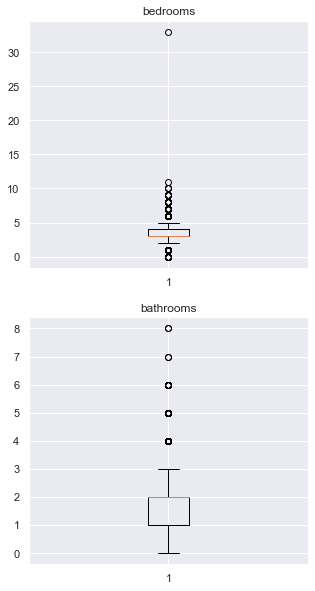

In [72]:
fig, axes = plt.subplots(2, figsize= (5,10))
axes[0].set_title("bedrooms")
axes[0].boxplot(data.bedrooms)
axes[1].set_title("bathrooms")
axes[1].boxplot(data.bathrooms)

In [73]:
data = data.drop(columns="date")
z_scores = stats.zscore(data)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

data = data[filtered_entries]

using the z score we can determine outliers, by doing so, we will remove every line where an outlier in its own column is detected.

{'whiskers': [<matplotlib.lines.Line2D at 0x24e405556a0>,
 'caps': [<matplotlib.lines.Line2D at 0x24e40555c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e40537e10>],
 'medians': [<matplotlib.lines.Line2D at 0x24e44228208>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e4055f518>],
 'means': []}

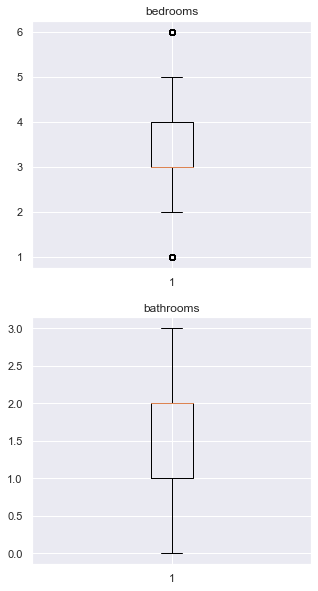

In [74]:
fig, axes = plt.subplots(2, figsize= (5,10))
axes[0].set_title("bedrooms")
axes[0].boxplot(data.bedrooms)
axes[1].set_title("bathrooms")
axes[1].boxplot(data.bathrooms)

c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

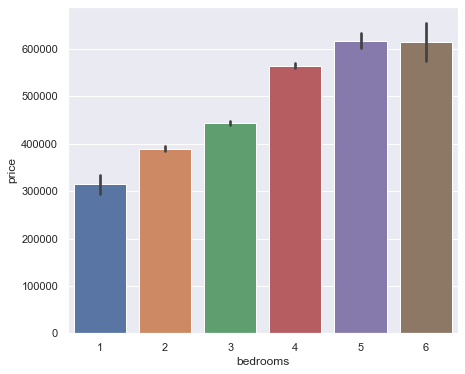

In [75]:
sns.barplot(data.bedrooms, data.price)

c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

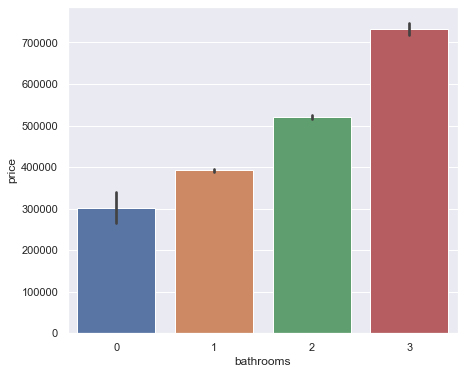

In [76]:
sns.barplot(data.bathrooms,data.price)


c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

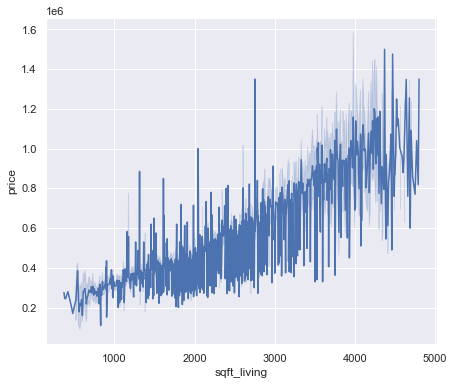

In [77]:
sns.lineplot(data.sqft_living, data.price)

In [78]:
data.dtypes

id               int64
price          float64
bedrooms         int64
bathrooms        int64
sqft_living      int64
sqft_lot         int64
floors         float64
view             int64
condition        int64
grade            int64
sqft_above       int64
yr_built         int64
zipcode          int64
lat            float64
long           float64
dtype: object

c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='grade', ylabel='price'>

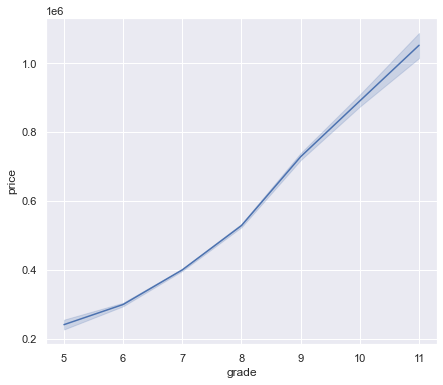

In [79]:
sns.lineplot(data.grade, data.price)

c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='floors', ylabel='price'>

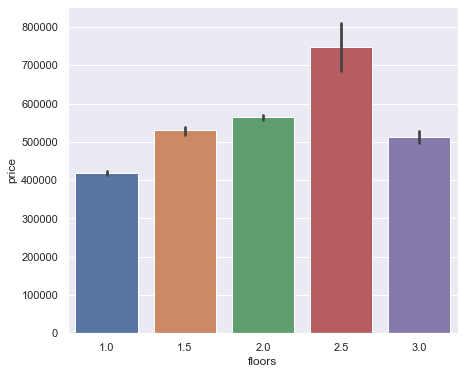

In [80]:
sns.barplot(data.floors, data.price)

get some more information through the correlation matrix (we will be most interested in the correlation with price)

<AxesSubplot:>

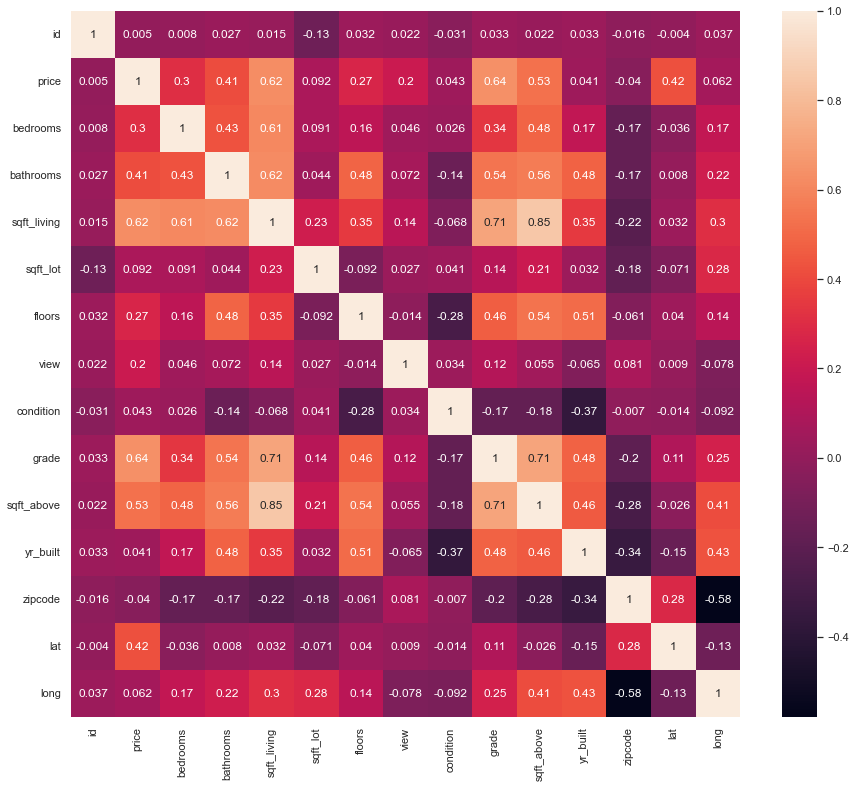

In [81]:
sns.set(rc={'figure.figsize':(15,13)})
sns.heatmap(data.corr().round(decimals=3), annot=True)

with this heatmap of the correlation matrix, we can focus on the price line or column, and determine which feature is most interesting by having a correlation that is either closest to 1 or -1. thanks to the heatmap plot, we can easily see it with the color.

### Step 2: Feature selection

using the heatmap, as well as the other plots we have made previously in the data visualization step, we can start selecting a few features:
 - We are going to do multiple types of regression, one that requires only 1 feature, and two other models that require more than 1.
 - To keep it simple as well as effective, we will select features with a correlation equal to or above 0.3, or equal to and below -0.3.
 - Each feature will be used for the simple linear model that uses one feature.
 - all 3 models will be visualized and compared.

In [82]:
# the most promising features are: bedrooms, bathrooms, sqft_living, grade, sqft_above, lat
X = data[["bedrooms", "bathrooms", "sqft_living", "grade", "sqft_above", "lat"]]
# separating the target label
Y = data["price"]
(X.shape, Y.shape)

((19605, 6), (19605,))

In [83]:
# separating testing dataset and training dataset for the multiple and poly models
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

((13135, 6), (13135,), (6470, 6), (6470,))

In [84]:
# for simple linear models
X_train_0, X_test_0, Y_train_0, Y_test_0 = train_test_split(X.iloc[:,0].to_numpy(), Y, test_size=0.33, random_state=42)
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X.iloc[:,1].to_numpy(), Y, test_size=0.33, random_state=42)
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X.iloc[:,2].to_numpy(), Y, test_size=0.33, random_state=42)
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X.iloc[:,3].to_numpy(), Y, test_size=0.33, random_state=42)
X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(X.iloc[:,4].to_numpy(), Y, test_size=0.33, random_state=42)
X_train_5, X_test_5, Y_train_5, Y_test_5 = train_test_split(X.iloc[:,5].to_numpy(), Y, test_size=0.33, random_state=42)

### Step 3: Apply and visualize linear regression

In [85]:
#create the models

print(type(X_train_0))

# simple linear reg

lin_reg_0 = LinearRegression().fit(X_train_0[:, None], Y_train_0)
lin_reg_1 = LinearRegression().fit(X_train_1[:, None], Y_train_1)
lin_reg_2 = LinearRegression().fit(X_train_2[:, None], Y_train_2)
lin_reg_3 = LinearRegression().fit(X_train_3[:, None], Y_train_3)
lin_reg_4 = LinearRegression().fit(X_train_4[:, None], Y_train_4)
lin_reg_5 = LinearRegression().fit(X_train_5[:, None], Y_train_5)

#apply predictions
Y_pred_0 = lin_reg_0.predict(X_train_0[:,None])
Y_pred_1 = lin_reg_1.predict(X_train_1[:,None])
Y_pred_2 = lin_reg_2.predict(X_train_2[:,None])
Y_pred_3 = lin_reg_3.predict(X_train_3[:,None])
Y_pred_4 = lin_reg_4.predict(X_train_4[:,None])
Y_pred_5 = lin_reg_5.predict(X_train_5[:,None])

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'lat')

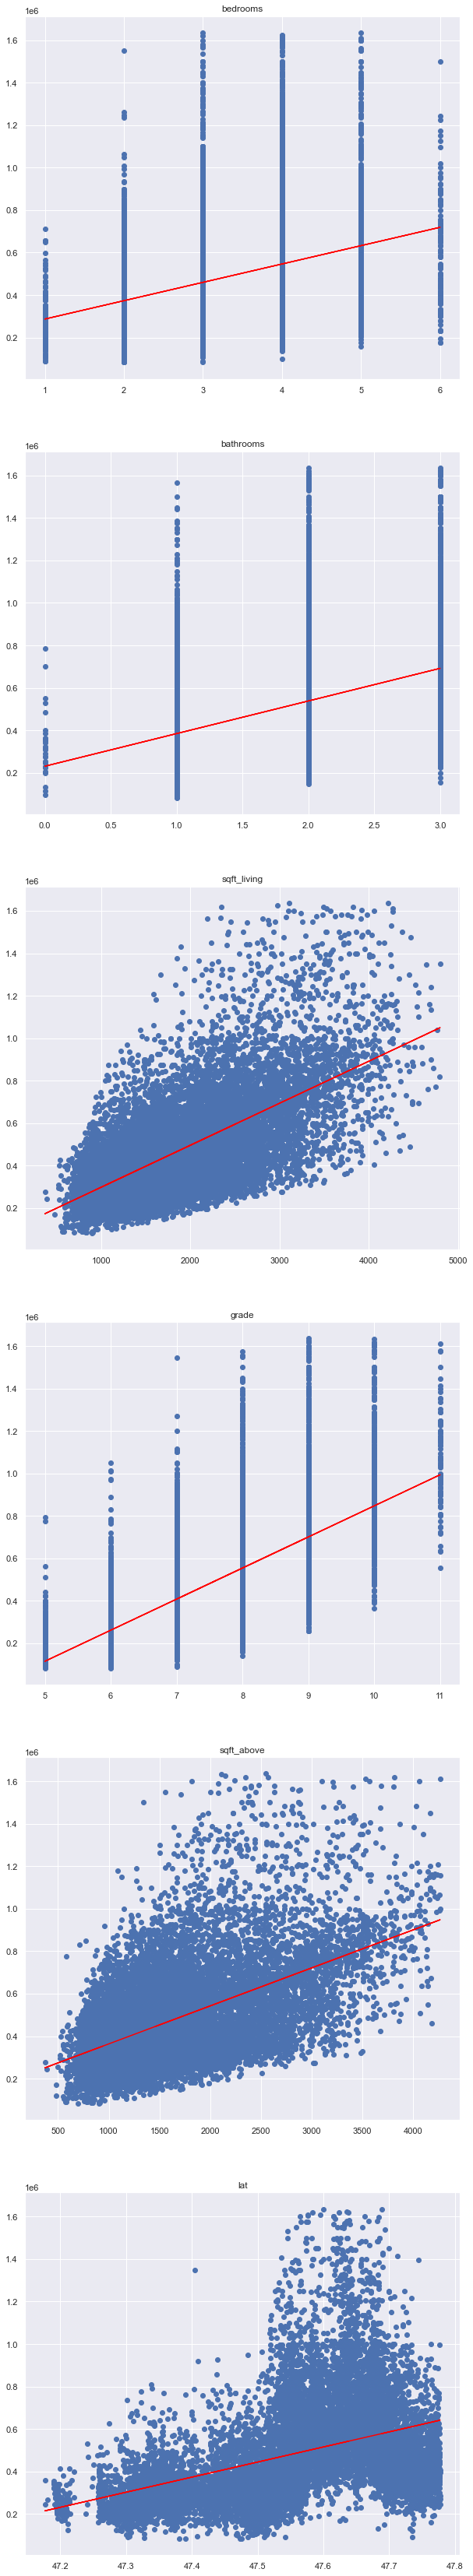

In [91]:
# lets plot sqft_living, grade, sqft_above, lat
fig, axs = plt.subplots(6, figsize= (10,60))
axs[0].scatter(X_train_0, Y_train_0)
axs[0].plot(X_train_0, Y_pred_0, c= "red")
axs[0].set_title("bedrooms")

axs[1].scatter(X_train_1, Y_train_1)
axs[1].plot(X_train_1, Y_pred_1, c= "red")
axs[1].set_title("bathrooms")

axs[2].scatter(X_train_2, Y_train_2)
axs[2].plot(X_train_2, Y_pred_2, c= "red")
axs[2].set_title("sqft_living")

axs[3].scatter(X_train_3, Y_train_3)
axs[3].plot(X_train_3, Y_pred_3, c= "red")
axs[3].set_title("grade")

axs[4].scatter(X_train_4, Y_train_4)
axs[4].plot(X_train_4, Y_pred_4, c= "red")
axs[4].set_title("sqft_above")

axs[5].scatter(X_train_5, Y_train_5)
axs[5].plot(X_train_5, Y_pred_5, c= "red")
axs[5].set_title("lat")


In [87]:
print(lin_reg_0.score(X_test_0[:, None], Y_test_0))
print(lin_reg_1.score(X_test_1[:, None], Y_test_1))
print(lin_reg_2.score(X_test_2[:, None], Y_test_2))
print(lin_reg_3.score(X_test_3[:, None], Y_test_3))
print(lin_reg_4.score(X_test_4[:, None], Y_test_4))
print(lin_reg_5.score(X_test_5[:, None], Y_test_5))


0.08309712017985194
0.16286365809616854
0.38889852117593704
0.4086381833685315
0.2688019355762541
0.1892513725517756


### Step 4: Apply multilinear regression

In [88]:

#multi linear reg
multi_reg = LinearRegression().fit(X_train, Y_train)
multi_reg.score(X_test, Y_test)

0.6172681779493776

### Step 5: Apply polynomial regression

In [89]:
poly = PolynomialFeatures(degree=3)
x_= poly.fit_transform(X_train)
poly_reg = LinearRegression().fit(x_, Y_train)
poly_reg.score(poly.fit_transform(X_test), Y_test)

0.6772826940507614

### Step 6: Compare the 3

by comparing the scores of all models, it is safe to say that the polynomial regression model is the most accurate and reliable of all the others we tried.
for the simple linear regression models, the highest score was of 0.4, for multiple linear regression, it was 0.61, and for poly regression, it is 0.68.
we can see a big gap between all of them, especially the simple linear and the other 2, meaning that the more features we have, the better our model will perform. And by using the poly model, we can really deepen the connection between features and thus track patterns in our data more accurately.